In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r'C:\Users\CRIZMA\Downloads\ML Projects\Project 3\archive (1)\Mall_Customers.csv')

# Explore Data

In [3]:
data.head()
# data.tail()
# data.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 2- Transform Object data

In [7]:
la = LabelEncoder()
# Label encoding is a data preprocessing technique used in machine learning to convert categorical variables into a numerical format. This conversion is necessary because most machine learning algorithms are designed to work with numerical input data. 

In [8]:
data.Gender = la.fit_transform(data.Gender)

In [9]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [182]:
# SA = StandardScaler()

In [220]:
# x_data=SA.fit_transform(data)

In [11]:
clustersn=[]
j=[]

In [12]:
for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(data)
    clustersn.append(i)
    j.append(model.inertia_)
    # culculate error in each cluster(inertia)


C:\Users\CRIZMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CRIZMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CRIZMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CRIZMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

In [13]:
pd.DataFrame(clustersn,j)

,0
975512.060000,1
387065.713771,2
272125.319057,3
195401.198560,4
157215.866975,5
122698.106618,6
110011.984572,7
95638.458178,8
82025.553371,9
71021.833833,10


Text(0, 0.5, 'Error Sum')

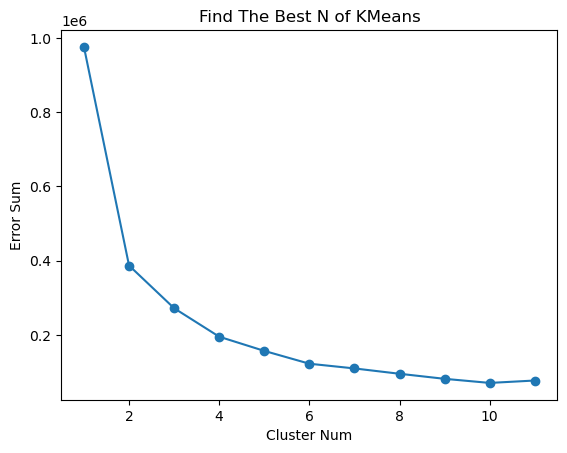

In [14]:
plt.plot(clustersn,j,marker='o')
plt.title("Find The Best N of KMeans")
plt.xlabel("Cluster Num")
plt.ylabel("Error Sum")

In [15]:
model=KMeans(n_clusters=4)
model.fit(data)
pre = model.predict(data)

C:\Users\CRIZMA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
data['k_mean']=pre

In [17]:
data.sample(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
168,169,0,36,87,27,2
40,41,0,65,38,35,3
84,85,0,21,54,57,0
118,119,0,51,67,43,0
39,40,0,20,37,75,3
101,102,0,49,62,48,0
144,145,1,25,77,12,2
53,54,1,59,43,60,3
0,1,1,19,15,39,3
171,172,1,28,87,75,1


In [18]:
df1=data[data['k_mean']==0]
df2=data[data['k_mean']==1]
df3=data[data['k_mean']==2]
df4=data[data['k_mean']==3]

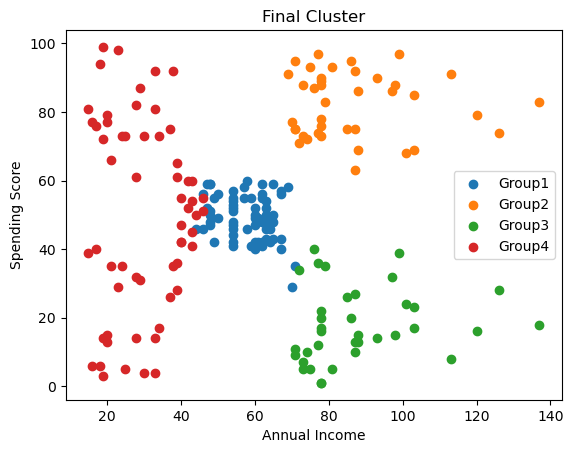

In [19]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='Group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='Group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='Group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='Group4')
plt.title('Final Cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

# Data Analysis

<Axes: xlabel='k_mean', ylabel='count'>

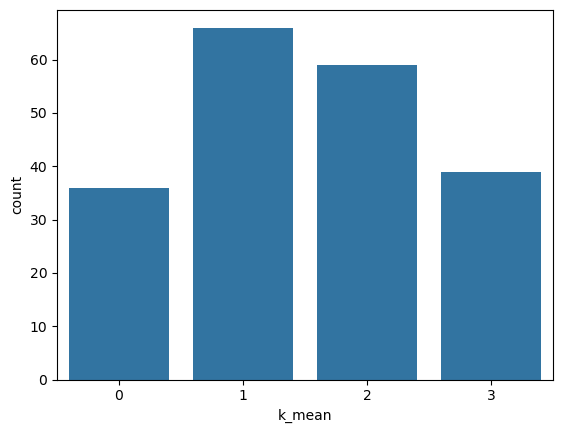

In [248]:
sns.countplot(x="k_mean", data=data)

<Axes: ylabel='count'>

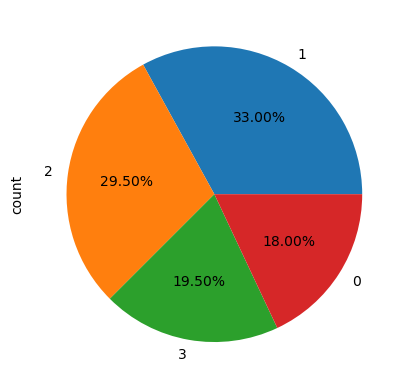

In [240]:
data['k_mean'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='k_mean', ylabel='Spending Score (1-100)'>

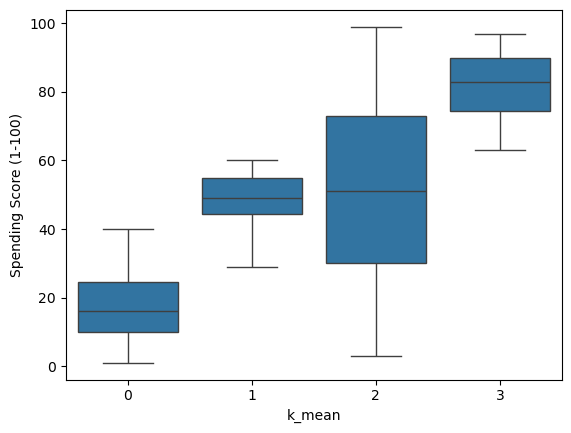

In [244]:
sns.boxplot(x='k_mean',y='Spending Score (1-100)',data = data)

<Axes: xlabel='Age', ylabel='Count'>

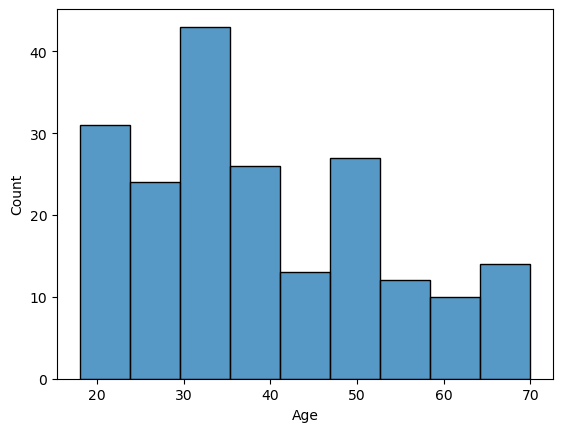

In [245]:
sns.histplot(data.Age)

<Axes: xlabel='k_mean', ylabel='count'>

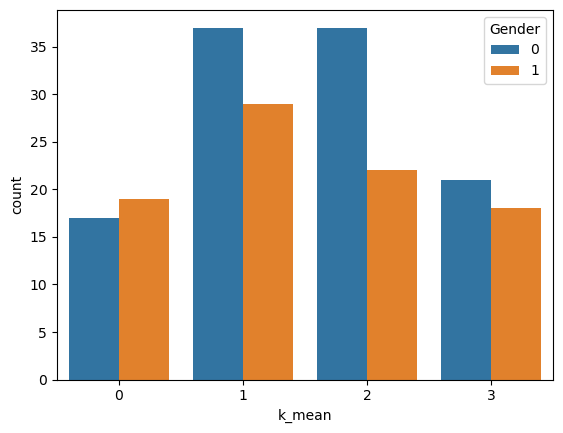

In [249]:
sns.countplot(x='k_mean',hue='Gender',data=data)

<Axes: xlabel='Gender', ylabel='count'>

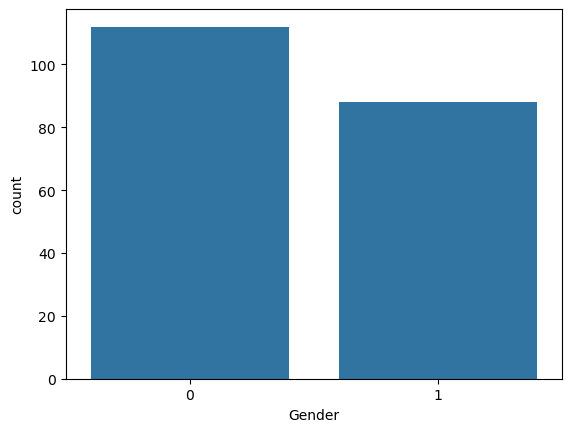

In [251]:
sns.countplot(x='Gender',data=data)